This notebook recreates the ABC inference procedure from scratch, for selected models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.ABC_priors_and_functions as ABC
import data_preprocessing.plotting_functions as ABC_plot

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In the next code block, uncomment whichever model and mode you wish to run.

In [ ]:
### -------- PULSE PORTION MODELS ----------- ###

#simulator = "one population pulse"
#simulator = "preliminary two population pulse"
#simulator = "two population pulse"
#simulator = "three population pulse"
simulator = "stochastic three population pulse"
#simulator = "dispersed three population pulse"

### -------- PULSE-CHASE PORTION MODELS ----------- ###

#simulator = "two population chase"
#simulator = "variable p two population chase"
#simulator = "three population chase"

In [3]:
inference_portion = simulator[-5:]
model = simulator[:-6]

The following code block will run number_sims number of simulations, and is the ABC time bottleneck. 

On a 4 core laptop (8.00GB of RAM, 1.70GHz CPU):

- Setting number_sims = 100 takes ~4 minutes to run
- Setting number_sims = 500 takes ~10 minutes to run
- Setting number_sims = 1000 takes ~20 minutes to run
- etc.

Set this parameter according to your own time constraints, but the larger it is the better the ABC will perform.

Stochastic three population model will take longer to run as it is running an inhomogeneous Gillespie rather than a standard Gillespie.

If you wish to set number_sims to be large (eg num_sims> 5000), we recommend running in batches and saving intermediary products to avoid memory issues. In our paper, we set number_sims=500000 split into 100 batches, which can take up to 2 hours to run with 128 cores. 

In [4]:
if model == "stochastic three population":
    hetero = True
    edu_hetero = False
elif model == "dispersed three population":
    hetero = False
    edu_hetero = True
else:
    hetero = False
    edu_hetero = False
simulated_summaries, simulated_params = ABC.run(number_sims = 5, model = model, inference_portion = inference_portion, hetero = hetero, edu_hetero = edu_hetero)

Simulation 2 Finished
Simulation 0 Finished
Simulation 3 Finished
Simulation 4 Finished
Simulation 1 Finished
Simulations finished, returning outputs


The following code block will accept 'proportion_accepted' number of simulations out of the 'number_sims' simulations you ran in the above code block.

The smaller this parameter is, the better the accepted parameters will be, but the less accepted parameters you will have.

Adjust this parameter as you see fit.

In our paper, proportion_accepted = 0.001

In [8]:
proportion_accepted=0.5

accepted_params, bandwidth = ABC.ABC_reject(simulated_summaries, simulated_params, proportion_accepted, inference_portion = inference_portion, hetero=hetero, edu_hetero=edu_hetero)

The next code block plots prior and posterior distributions based on the previous simulations

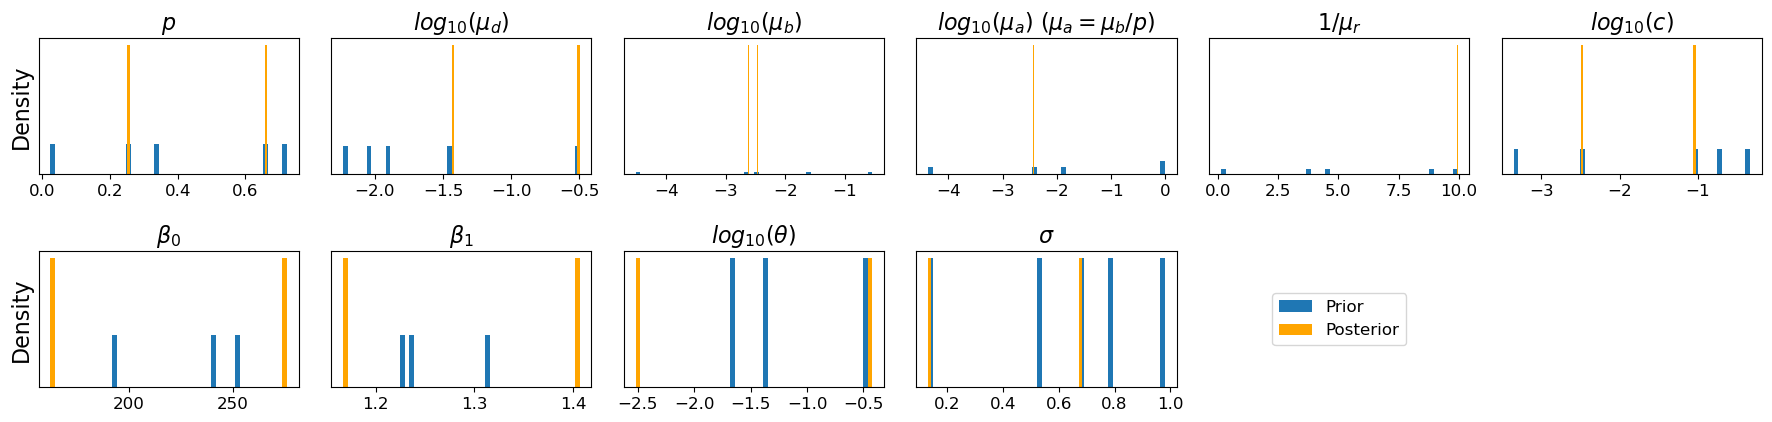

In [9]:
ABC_plot.plot_posteriors_manual(simulated_params, accepted_params, model = model, mode = inference_portion, dimensions = 1)

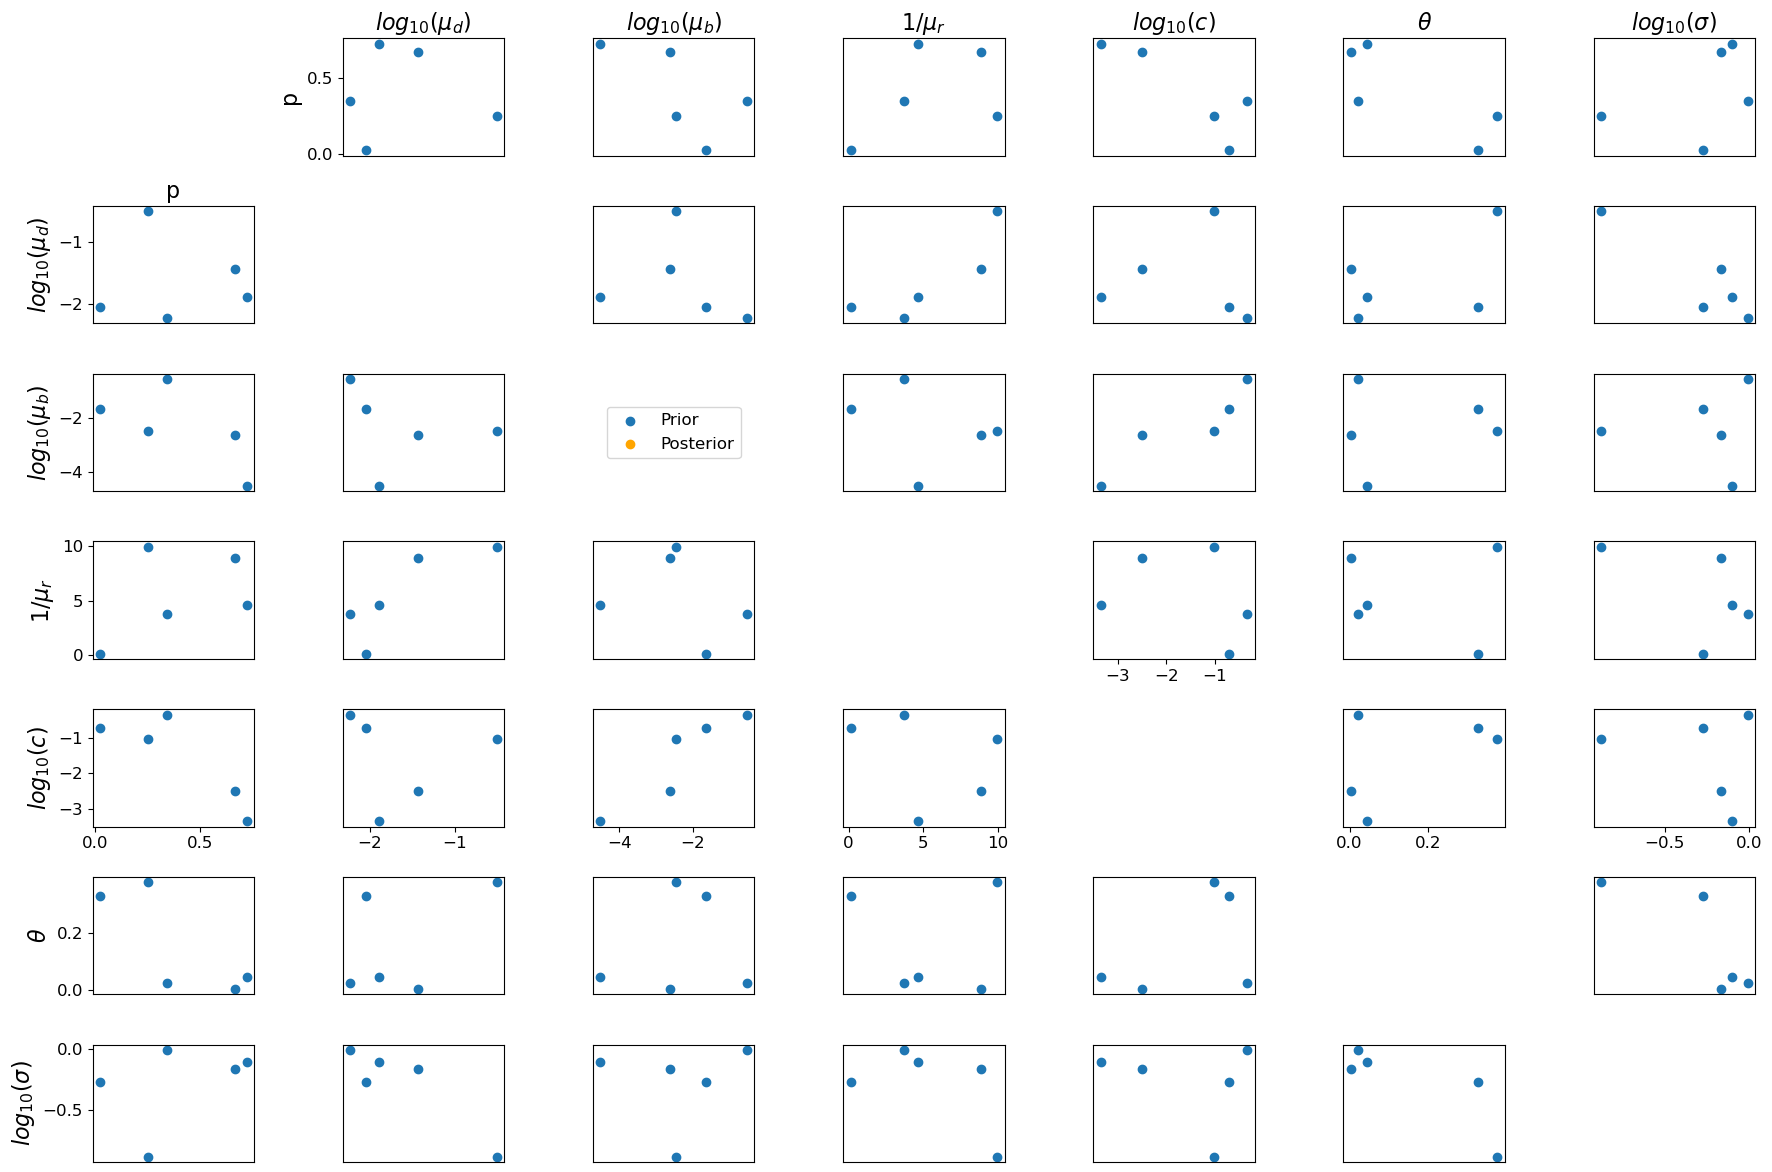

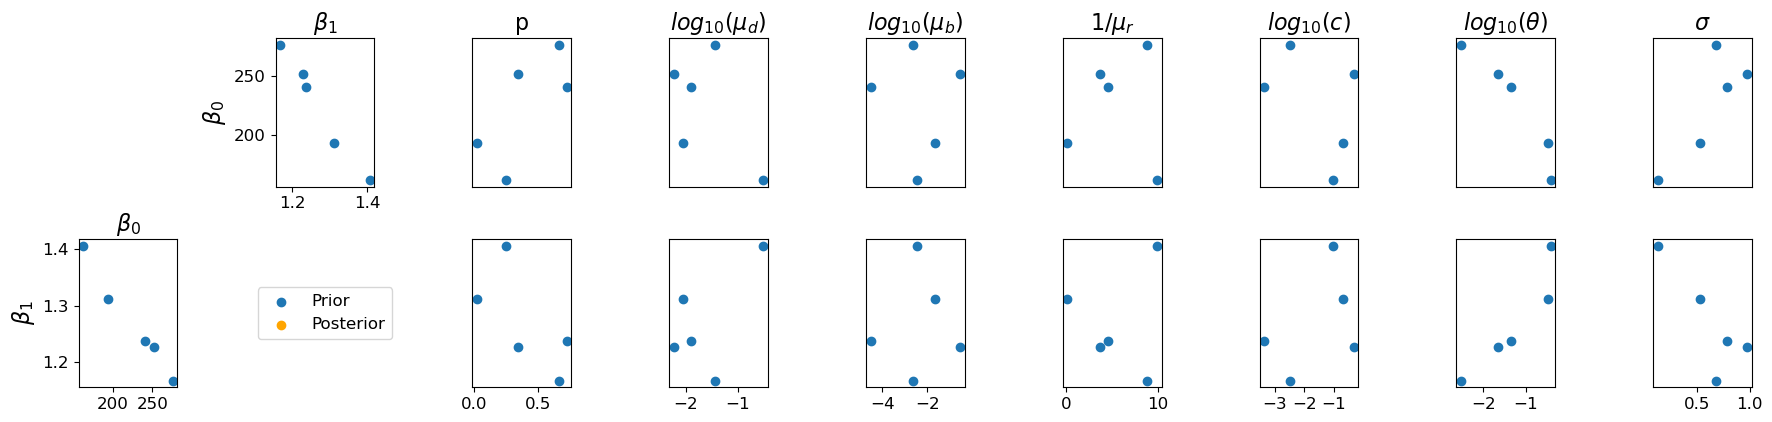

In [7]:
ABC_plot.plot_posteriors_manual(simulated_params, accepted_params, model = model, mode = inference_portion, dimensions = 2)